In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16705911797679915670
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2428653242693333372
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2518307065078675214
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 31999983616
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 7888087398396959771
physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:1c:00.0, compute capability: 7.0"
, name: "/device:GPU:1"
device_type: "GPU"
m

In [2]:
import tensorflow as tf

print(tf.test.is_gpu_available())

True


## Load Data

In [4]:
import os
import cv2
import numpy as np

img_width = 600
img_height = 600

train_path = "./train_ROI+CLAHE/"
train_path0 = os.listdir(train_path + "epidural")
train_path1 = os.listdir(train_path + "healthy")
train_path2 = os.listdir(train_path + "intraparenchymal")
train_path3 = os.listdir(train_path + "intraventricular")
train_path4 = os.listdir(train_path + "subarachnoid")
train_path5 = os.listdir(train_path + "subdural")

train_data0 = []
for i in range(len(train_path0)):
    train_image = cv2.imread(os.path.join(train_path + "epidural/", train_path0[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data0.append(train_image)
train_data0 = np.array(train_data0)
    
train_data1 = []
for i in range(len(train_path1)):
    train_image = cv2.imread(os.path.join(train_path + "healthy/", train_path1[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data1.append(train_image)
train_data1 = np.array(train_data1)

train_data2 = []
for i in range(len(train_path2)):
    train_image = cv2.imread(os.path.join(train_path + "intraparenchymal/", train_path2[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data2.append(train_image)
train_data2 = np.array(train_data2)

train_data3 = []
for i in range(len(train_path3)):
    train_image = cv2.imread(os.path.join(train_path + "intraventricular/", train_path3[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data3.append(train_image)
train_data3 = np.array(train_data3)

train_data4 = []
for i in range(len(train_path4)):
    train_image = cv2.imread(os.path.join(train_path + "subarachnoid/", train_path4[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data4.append(train_image)
train_data4 = np.array(train_data4)

train_data5 = []
for i in range(len(train_path5)):
    train_image = cv2.imread(os.path.join(train_path + "subdural/", train_path5[i]))[:,:,::-1]
    train_image = cv2.resize(train_image, (img_width, img_height))
    train_data5.append(train_image)
train_data5 = np.array(train_data5)

train_data = np.concatenate([train_data0,
                             train_data1,
                             train_data2,
                             train_data3,
                             train_data4,
                             train_data5], 0)
train_label = np.concatenate([[0]*(len(train_data0)),
                              [1]*(len(train_data1)),
                              [2]*(len(train_data2)),
                              [3]*(len(train_data3)),
                              [4]*(len(train_data4)),
                              [5]*(len(train_data5))], 0)


val_path = "./val_ROI+CLAHE/"
val_path0 = os.listdir(val_path + "epidural")
val_path1 = os.listdir(val_path + "healthy")
val_path2 = os.listdir(val_path + "intraparenchymal")
val_path3 = os.listdir(val_path + "intraventricular")
val_path4 = os.listdir(val_path + "subarachnoid")
val_path5 = os.listdir(val_path + "subdural")

val_data0 = []
for i in range(len(val_path0)):
    val_image = cv2.imread(os.path.join(val_path + "epidural/", val_path0[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data0.append(val_image)
val_data0 = np.array(val_data0)
    
val_data1 = []
for i in range(len(val_path1)):
    val_image = cv2.imread(os.path.join(val_path + "healthy/", val_path1[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data1.append(val_image)
val_data1 = np.array(val_data1)

val_data2 = []
for i in range(len(val_path2)):
    val_image = cv2.imread(os.path.join(val_path + "intraparenchymal/", val_path2[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data2.append(val_image)
val_data2 = np.array(val_data2)

val_data3 = []
for i in range(len(val_path3)):
    val_image = cv2.imread(os.path.join(val_path + "intraventricular/", val_path3[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data3.append(val_image)
val_data3 = np.array(val_data3)

val_data4 = []
for i in range(len(val_path4)):
    val_image = cv2.imread(os.path.join(val_path + "subarachnoid/", val_path4[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data4.append(val_image)
val_data4 = np.array(val_data4)

val_data5 = []
for i in range(len(val_path5)):
    val_image = cv2.imread(os.path.join(val_path + "subdural/", val_path5[i]))[:,:,::-1]
    val_image = cv2.resize(val_image, (img_width, img_height))
    val_data5.append(val_image)
val_data5 = np.array(val_data5)

val_data = np.concatenate([val_data0,
                           val_data1,
                           val_data2,
                           val_data3,
                           val_data4,
                           val_data5], 0)
val_label = np.concatenate([[0]*(len(val_data0)),
                            [1]*(len(val_data1)),
                            [2]*(len(val_data2)),
                            [3]*(len(val_data3)),
                            [4]*(len(val_data4)),
                            [5]*(len(val_data5))], 0)


## Modeling

In [19]:
from keras.preprocessing.image import ImageDataGenerator
import efficientnet.keras as efn
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import multi_gpu_model

epochs = 25
def step_decay(epoch):     
    if (epoch < 5):
        return(6e-5)
    elif (epoch < 10):
        return(3e-5)
    elif (epoch < 15):
        return(1e-5)
    elif (epoch < 20):
        return(8e-6)
    else:
        return(1e-6)

from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay, verbose=1)
callbacks_list = [lrate]

datagen = ImageDataGenerator(
                            width_shift_range = 2.0,     # 水平平移
                            height_shift_range = 2.0,    # 垂直平移
                            rotation_range = 20,         # 0-180 任一角度旋轉
                            horizontal_flip = True,      # 任意水平翻轉
                            vertical_flip = True,        # 任意垂直翻轉
                            fill_mode = "constant",      # 在旋轉或平移時，有空隙發生，則空隙補常數
                            cval = 0                     # 設定常數值為 0
                            )

pre_model = efn.EfficientNetB7(include_top = False, weights='imagenet', pooling='avg')
x = pre_model.output
output_layer = Dense(6, activation ='softmax')(x)
model = Model(inputs = pre_model.input, outputs = output_layer)

for layer in model.layers[:-2]:
    layer.trainable = True
for layer in model.layers[-2:]:
    layer.trainable = True 

for x in model.trainable_weights:
    print(x.name)
#    model.summary() 

stem_conv_3/kernel:0
stem_bn_3/gamma:0
stem_bn_3/beta:0
block1a_dwconv_3/depthwise_kernel:0
block1a_bn_3/gamma:0
block1a_bn_3/beta:0
block1a_se_reduce_3/kernel:0
block1a_se_reduce_3/bias:0
block1a_se_expand_3/kernel:0
block1a_se_expand_3/bias:0
block1a_project_conv_3/kernel:0
block1a_project_bn_3/gamma:0
block1a_project_bn_3/beta:0
block1b_dwconv_3/depthwise_kernel:0
block1b_bn_3/gamma:0
block1b_bn_3/beta:0
block1b_se_reduce_3/kernel:0
block1b_se_reduce_3/bias:0
block1b_se_expand_3/kernel:0
block1b_se_expand_3/bias:0
block1b_project_conv_3/kernel:0
block1b_project_bn_3/gamma:0
block1b_project_bn_3/beta:0
block1c_dwconv_3/depthwise_kernel:0
block1c_bn_3/gamma:0
block1c_bn_3/beta:0
block1c_se_reduce_3/kernel:0
block1c_se_reduce_3/bias:0
block1c_se_expand_3/kernel:0
block1c_se_expand_3/bias:0
block1c_project_conv_3/kernel:0
block1c_project_bn_3/gamma:0
block1c_project_bn_3/beta:0
block1d_dwconv_3/depthwise_kernel:0
block1d_bn_3/gamma:0
block1d_bn_3/beta:0
block1d_se_reduce_3/kernel:0
bloc

## Model Fitting

In [20]:
batch_size = 8
parallel_model = multi_gpu_model(model, gpus = 4, cpu_merge = False)
parallel_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])   
model_history = parallel_model.fit_generator(
                                    datagen.flow(train_data, np.eye(6)[train_label], batch_size = batch_size),
                                    steps_per_epoch = len(train_label) / batch_size,
                                    validation_data = (val_data, np.eye(6)[val_label]),
                                    epochs = epochs, 
                                    verbose = 1,
                                    callbacks = callbacks_list
                                    )   
    
train_acc_history = model_history.history['acc']
train_loss_history = model_history.history['loss']
val_acc_history = model_history.history['val_acc']
val_loss_history = model_history.history['val_loss']

# test_acc_history = model_history.history['val_acc']
# test_loss_history = model_history.history['val_loss']

Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 6e-05.
586/586 [==============================] - 990s 2s/step - loss: 1.7118 - acc: 0.2743 - val_loss: 1.4079 - val_acc: 0.4143
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 6e-05.
586/586 [==============================] - 599s 1s/step - loss: 1.4862 - acc: 0.4136 - val_loss: 1.1831 - val_acc: 0.5558
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 6e-05.
586/586 [==============================] - 600s 1s/step - loss: 1.3355 - acc: 0.4767 - val_loss: 1.1047 - val_acc: 0.6070
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 6e-05.
586/586 [==============================] - 600s 1s/step - loss: 1.2089 - acc: 0.5392 - val_loss: 1.0546 - val_acc: 0.6334
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 6e-05.
586/586 [==============================] - 597s 1s/step - loss: 1.1253 - acc: 0.5847 - val_loss: 1.1876 - val_acc: 0.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


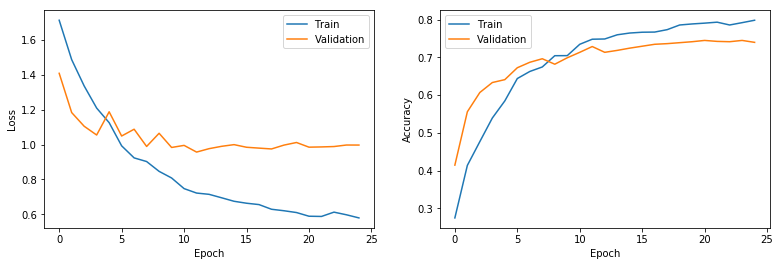

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.legend(loc = "lower left")
plt.legend(['Train','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(loc = "lower right")
plt.legend(['Train','Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.savefig('./20201117_v3_ROI+CLAHE_b7_DM_loss.png', dpi = 300)

In [22]:
model.save('20201117_v3_ROI+CLAHE_b7_DM.h5')

## Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score 

test_path = "./test_ROI+CLAHE/"
test_path_image = os.listdir(test_path + "image")

test_data = []
for i in range(len(test_path_image)):
    test_image = cv2.imread(os.path.join(test_path + "image/", test_path_image[i]))[:,:,::-1]
    test_image = cv2.resize(test_image, (img_width, img_height))
    test_data.append(test_image)
test_data = np.array(test_data)

test_predict_prob = model.predict(test_data)
test_predict_label = np.argmax(test_predict_prob, axis = 1)


## Save the result to csv

In [ ]:
test_predict_label_list = []
for i in test_predict_label:
    test_predict_label_list.append(str(i))

ROOT_DIR = "./" 
file = open(ROOT_DIR + 'testing_submission_trail2_CT_G02.csv',"a")
for j in range(len(test_predict_label_list)):
    if (test_predict_label_list[j] == '0'):
        test_predict_label_list[j] = 'epidural'
    elif (test_predict_label_list[j] == '1'):
        test_predict_label_list[j] = 'healthy'
    elif (test_predict_label_list[j] == '2'):
        test_predict_label_list[j] = 'intraparenchymal'
    elif (test_predict_label_list[j] == '3'):
        test_predict_label_list[j] = 'intraventricular'
    elif (test_predict_label_list[j] == '4'):
        test_predict_label_list[j] = 'subarachnoid'
    else:
        test_predict_label_list[j] = 'subdural'
    
    file.write("".join(test_predict_label_list[j]))
    file.write('\n')
file.close()